(ch:sampling-distribution)=
# 표본분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

표본 분포의 주요 개념을 소개한다.

- 독립동일분포
- 정규분포 연산
- 표본평균의 분포
- 중심극한정리
- 큰 수의 법칙

## 독립성과 상관성

### 독립성

확률변수 $X$와 $Y$가 서로 어떤 영향도 끼치지 않을 때 상호 독립이라 한다.
수식으로 표혀하면 다음 수식이 성립할 때 두 확률변수가 상호 독립이라 정의한다.

$$
f_{XY}(x, y) = f_X(x) \cdot f_Y(y)
$$

위 수식에서 $f_X$와 $f_Y$ 는 각각 $X$와 $Y$에 대한 주변확률을 계산하는 함수를 가리킨다.
$X$와 $Y$가 이산확률변수인 경우 주변확률질량함수는 다음과 같이 정의된다.

$$
f_X(x) = \sum_k f_{XY}(x, y_k) \qquad f_Y(y) = \sum_n f_{XY}(x_n, y)
$$

$x_n$과 $y_k$는 각각 확률변수 $X$와 $Y$가 가리킬 수 있는 유한개의 값을 나타낸다.

**예제**

예를 들어 $X$는 공정한 주사위를 던져서 나오는 값을 가리키는 확률변수라 하자.
$X$의 확률분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

반면에 $Y$는 아래 확률분포를 갖는 불공정한 주사위를 던져서 나오는 값을 가리키는 확률 변수라 하자.

| Y | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/21 | 2/21 | 3/21 | 4/21 | 5/21 | 6/21 |

공정한 주사위와 불공정한 주사위를 동시에 던져서 나오는 값으로 구성된 $(x, y)$ 가 발생할 확률은
단순히 $x$가 발생할 확률과 $y$가 발생할 확률의 곱이다.
두 주사위의 결과 $x$와 $y$가 서로 어떤 영향도 주고받지 않기 때문에 각각의 경우가 발생할 확률을 곱한다.

$x$가 발생할 확률은 항상 1/6이고 $y$가 발생할 확률은 $y/21$이기게 결합확률질량함수는 다음과 같다.

In [8]:
def f_XY(x, y):
    if y in range(1, 7):
        return (1/6) * (y/21) # x의 확률은 항상 1/6
    else:
        return 0

확률변수 각각에 대한 주변확률질량함수를 `f_XY()`를 이용하여 정의해보자.

- $X$에 대한 주변확률질량함수

In [9]:
def f_X(x):
    y_probs = [f_XY(x, y) for y in range(1, 7)]
    return np.sum(y_probs)

- $Y$에 대한 주변확률질량함수

In [10]:
def f_Y(y):
    x_probs = [f_XY(x, y) for x in range(1, 7)]
    return np.sum(x_probs)

아래 코드가 두 확률변수의 독립성을 확인해준다

In [11]:
xy = [f_XY(x, y) for x in range(1, 7) for y in range(1, 7)]
xMy = [f_X(x) * f_Y(y) for x in range(1, 7) for y in range(1, 7)]
np.allclose(xy, xMy)

True

### 독립성 대 무상관성

확률변수 $X$와 $Y$가 상호 독립이면 두 확률변수 사이에 어떠한 상관성도 존재하지 않는다.
예를 들어, 결합확률분포의 공분산과 상관계수도 0이 된다.
여기서는 두 개의 이산 확률변수 $X$와 $Y$로 구성된 결합확률변수 $(X, Y)$를 
이용하여 독립성과 무상관성을 설명한다. 

$(X, Y)$의 확률질량함수를 $f_{XY}$ 할 때 각 확률변수에 대한 
주변확률질량함수, 기댓값, 분산과
두 확률변수의 선형 상관관계를 측정하는 공분산과 피어슨 상관계수는
아래와 같이 정의된다.

- 기댓값

$$
\begin{align*}
E[X] &= \sum_n x_n\, f_X(x_n) = \sum_n x_n\, \sum_k f_{XY}(x_n, y_k)\\[.5ex] 
E[Y]&= \sum_k y_k\, f_Y(y_k) = \sum_k y_k\, \sum_n f_{XY}(x_n, y_k)\\[.5ex]
\end{align*}
$$

- 분산

$$
\begin{align*}
Var(X) &= \sum_n (x_n-E[X])^2\, f_X(x_n)\\[.5ex] 
Var(Y) &= \sum_k (y_k-E[Y])^2\, f_Y(y_k)\\[.5ex] 
\end{align*}
$$

- 공분산과 피어슨 상관계수

$$
\begin{align*}
Cov(X, Y) &= \sum_n\sum_k (x_n-E[X])\, (y_k-E[Y]) \, f_{XY}(x_n, y_k)\\[1ex]
Corr(X, Y) &= \frac{Cov(X, Y)}{\sqrt{Var(X)\, Var(Y)}}\
\end{align*}
$$

**독립이면 무상관이다!**

아래 식은 두 확률변수가 상호 독립이면 공분산이 0임을 증명한다.

$$
\begin{align*}
Cov(X, Y) &= \sum_n\sum_k (x_n - E[X])\, (y_k - E[Y]) \, f_{XY}(x_n, y_k)\\[1ex]
 &= \sum_n\sum_k (x_n - E[X])\, (y_k - E[Y]) \, f_n(x_n)\, f_{Y}(y_k)\\[1ex]
 &= \sum_n\big( (x_n - E[X])\, f_n(x)\, \sum_k (y_k - E[Y]) \, f_{Y}(y_k)\big )\\[1ex]
 &= 0
\end{align*}
$$

위 수식에서 마지막줄이 0인 이유는 바로 윗줄에 포함된 아래 수식이 0으로 계산되기 때문이다.

$$
\begin{align*}
\sum_k (y_k-E[Y]) \, f_{Y}(y_k) &= \sum_k y \, f_{Y}(y_k) - \sum_k E[Y] \, f_{Y}(y_k) \\[.5ex]
    &= E[Y] - E[Y] \, \sum_k f_{Y}(y_k) \\[.5ex]
    &= E[Y] - E[Y] \\[.5ex]
    &= 0
\end{align*}
$$

실제로 공정한 주사위를 던진 결과와 불공정한 주사위를 던진 결과의 공분산은 0으로 계산된다.
공분산이 0이면 피어슨 상관계수다 당연히 0이다.

- $X$의 기댓값: $E[X]$

In [12]:
E_X = np.sum([x * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_X

3.500000

- $Y$의 기댓값: $E[Y]$

In [13]:
E_Y = np.sum([y * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_Y

4.333333

- $X$와 $Y$의 공분산: $Cov(X, Y)$

In [14]:
Cov_XY = np.sum([(x-E_X)*(y-E_Y)*f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
Cov_XY

-0.000000

**무상관이지만 독립이 아닐 수 있다!**

결합확률변수 $XY$가 다음과 같이 정의된다.

In [15]:
x=np.array([1,0,-1,0])
y=np.array([0,1,0,-1])

XY = pd.DataFrame({'X':x, 'Y':y})
XY

,X,Y
0,1,0
1,0,1
2,-1,0
3,0,-1


네 가지 경우가 모두 한 번씩만 사용되기에 $XY$는 균등분포를 따른다.

| XY | (1, 0) | (0, 1) | (-1, 0) | (0, -1)|
| :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/4 | 1/4 | 1/4 | 1/4 |

함수 `f_XY()` 가 $XY$의 결합확률질량함수를 가리킨다.

In [16]:
def f_XY(x, y):
    if (x, y) in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
        return 1/4
    else:
        return 0

확률변수 각각에 대한 주변확률질량함수는 다음과 같다.

- $X$에 대한 주변확률질량함수

In [17]:
def f_X(x):
    y_probs = [f_XY(x, y) for y in range(-1, 2)]
    return np.sum(y_probs)

- $Y$에 대한 주변확률질량함수

In [18]:
def f_Y(y):
    x_probs = [f_XY(x, y) for x in range(-1, 2)]
    return np.sum(x_probs)

이제 확률변수 $X$와 $Y$의 공분산을 확인한다.
먼저 각 확률변수에 대한 기댓값을 계산한다.

- $X$의 기댓값: $E[X]$

In [19]:
E_X = np.sum([x * f_X(x) for x in range(-1, 2)])
E_X

0.000000

- $Y$의 기댓값: $E[Y]$

In [20]:
E_Y = np.sum([y * f_Y(y) for y in range(-1, 2)])
E_Y

0.000000

아래 코드는 $X$와 $Y$의 공분산으로 0으로 계산한다.

In [21]:
np.sum([(x-E_X)*(y-E_Y)*f_XY(x, y) for x in range(-1, 2) for y in range(-1, 2)])

0.000000

**균등분포의 공분산**

$XY$가 균등분포를 따르기에 
데이터프레임의 `cov()` 메서드를 이용하여 공분산을 확률을 무시한 채 바로 계산할 수 있으며
앞서 확인한 대로 두 확률변수의 공분산이 0으로 계산된다.

In [22]:
XY.cov(ddof=0)

,X,Y
X,0.5,0.0
Y,0.0,0.5


공분산이 0이기에 $X$와 $Y$ 사이에는 선형 상관관계가 없다.
하지만 선형이 아닌 다른 상관관계가 있음을 아래 코드가 그리는 그래프가 보여준다.

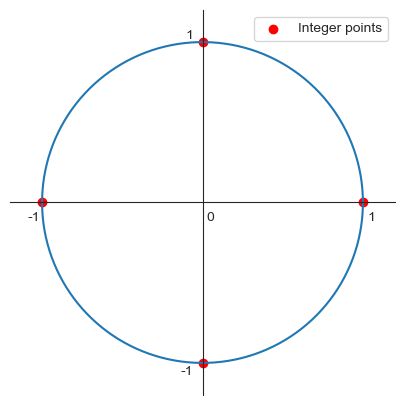

In [23]:
# 원 그래프 좌표 생성
# cos(theta)**2 + sin(theta)**2 = 1 
# theta 는 0부터 2*pi 까지 변함.

theta = np.linspace(0, 2*np.pi, 300)
x = np.cos(theta)
y = np.sin(theta)

# 반지름인 1인 원 위에 위치한 정수 좌표 4개
points = [(1, 0), (-1, 0), (0, 1), (0, -1)]

fig, ax = plt.subplots(figsize=(5, 5))

# 원 그리기
ax.plot(x, y, label="")

# 네 정수 좌표 산점도
x_ = [i for (i, j) in points] # points의 x-좌표값들
y_ = [j for (i, j) in points] # points의 y-좌표값들
ax.scatter(x_, y_, color='red', label="Integer points")

# x-축을 그래프의 중앙(y=0)에 배치
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 불필요한 테두리 숨김
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# 축 범위와 눈금 지정
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# 눈금 위치 및 값 지정
ax.set_xticks([-1.05, 0.05, 1.05])
ax.set_xticklabels([-1, 0, 1])

ax.set_yticks([-1.05, 1.05])
ax.set_yticklabels([-1, 1])

ax.legend()
ax.set_aspect('equal')

plt.show()

위 그래프에서 네 개의 빨강점은 $XY$가 가리킬 수 있는 네 개의 값을 네 개의 좌표로 보았을 때 그려진 점들이다.
사실 네 개의 점은 반지름이 1인 원에 포함된 점들 중에서 좌표가 정수인 유일한 네 개의 점이다.
즉 다음이 성립한다.

$$
x^2 + y^2 = 1^2
$$

이를 통해 $X$와 $Y$가 가리키는 값들 사이에 상관성이 있음을 알 수 있다.
실제로 주변확률질량함수의 곱과 결합확률질량함수가 서로 다름을 아래 코드가 확인해준다,

In [24]:
f_XY(1, 0) == f_X(1) * f_Y(0)

False

## 확률변수 연산과 선형변환

**확률변수 합과 차**

$X$와 $Y$ 두 개의 확률변수가 주어졌을 때 $X+Y$와 $X-Y$는 각각
두 확률변수의 합과 차를 가리키는 확률변수다.
즉, $X+Y$는 $X$가 가리키는 임의의 값과 $Y$가 가리키는 임의의 원소의 합을,
$X-Y$는 $X$가 가리키는 임의의 값과 $Y$가 가리키는 임의의 원소의 차를 가리킨다.

두 확률분포의 합의 분포와 차의 분포에 대한 확률함수를 직접 계산하기는 일반적으로 매우 어렵다.
반면에 합과 차의 분포의 기댓값과 분산은 아래 수식으로 쉽게 계산된다.
증명은 생략한다.

$$
E[X \pm Y] = E[X] \pm E[Y] \qquad V(X \pm Y) = V(X) \pm V(Y)
$$

**확률변수 선형변환**

확률변수 $X$와 임의의 실수 $a, b$가 주어졌을 때 $aX+b$는
$X$가 가리키는 값을 $a$배한 다음에 $b$를 더해준 값들을 가리키는 확률변수다.
선형변환된 확률분포의 기댓값과 분산은 다음과 같이 계산된다.
증명은 생략한다.

$$
E[aX + b] = aE[X] + b \qquad V(aX + b) = a^2V(X)
$$

### 정규분포 합과 차

상호 독립인 확률변수 $X$와 $Y$가 정규분포를 따른다고 가정한다.

$$
X \sim N(\mu_X, \sigma_X^2) \qquad Y \sim N(\mu_y, \sigma_y^2)
$$

그러면 두 확률 번수의 합과 차를 확률변수 $X+Y$와 $X-Y$ 모두 정규분포를 따르며
두 분포가 따르는 정규분포는 다음과 같다.

$$
X+Y \sim N(\mu_X+\mu_Y,\sigma_{X}^{2}+\sigma_{Y}^{2}) \qquad X-Y \sim N(\mu_X-\mu_Y,\ \sigma_{X}^{2}+\sigma_{Y}^{2})
$$

즉, $X+Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 합과 분산의 합으로,
$X-Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 차와 분산의 합으로 계산된다.
$X+Y$와 $X-Y$의 분산이 두 확률변수 각각의 분산의 합으로 계산되는 이유를 직관적으로 설명하기 위해
다음 두 예제를 이용한다.

**예제: 남성, 여성 체중의 합의 분포**

한국 20대 남성, 여성의 체중 분포 $X$와 $Y$는 다음과 같다고 가정한다.

$$
X \sim N(76.59, 11.73^2) \qquad Y \sim N(58.17, 9.28^2)
$$

만약 남성과 여성의 체중이 상호 독립이면 남성과 여성의 체중의 합은
다음 분포를 따라야 한다. 

$$
X+Y \sim N(134.76, 14.96^2)
$$

위 사실을 코드로 확인해보기 위해 언급된
평균값과 표준편차를 갖는 정규분포를 이용하여
남성과 여성의 체중 데이터를 각각 1천개씩 무작위로 생성한다.

In [25]:
from scipy.stats import norm

- 남녀 체중의 평균값과 표준편차 지정

In [26]:
mu_men = 76.59
sigma_men = 11.73

mu_wemen = 58.17
sigma_wemen = 9.28

- 평균값의 합과 차, 분산 합의 제곱근값 계산

In [27]:
mu_sum = mu_men + mu_wemen
mu_diff = mu_men - mu_wemen

sigma_sum = np.sqrt(sigma_men**2 + sigma_wemen**2)

print("평균값 합:", mu_sum)
print("평균값 차:", mu_diff)
print("분산 합의 제곱근:", round(sigma_sum, 2))

평균값 합: 134.76
평균값 차: 18.42
분산 합의 제곱근: 14.96


- 남성, 여성, 합, 차의 정규분포 지정

In [28]:
X_men = norm(mu_men, sigma_men)
Y_wemen = norm(mu_wemen, sigma_wemen)

X_sum = norm(mu_sum, sigma_sum)
X_diff = norm(mu_diff, sigma_sum)

지정된 정규분포를 이용하여 남녀 각각 1천 개 데이터 샘플을 무작위로 생성한다.
`norm` 객체의 `rvs()` 메서드를 이용한다.
`rvs()` 메서드는 누적분포함수의 역함수에 해당한다.

In [29]:
np.random.seed(17)

data_men = X_men.rvs(size=1000)
data_wemen = Y_wemen.rvs(size=1000)

생성된 남녀 데이터는 다음과 같다.

In [30]:
data = pd.DataFrame({'Men': data_men, 'Wemen':data_wemen})
data

,Men,Wemen
0,79.830599,60.074171
1,54.835213,54.710194
2,83.908360,64.312568
3,90.024501,55.311428
4,88.756244,59.580689
...,...,...
995,79.400000,43.422549
996,94.674727,73.472021
997,72.251896,60.795651
998,59.569254,44.340925


남녀 데이터의 합과 차를 추가한다.

In [31]:
data['Men+Wemen'] = data_men + data_wemen
data['Men-Wemen'] = data_men - data_wemen
data

,Men,Wemen,Men+Wemen,Men-Wemen
0,79.830599,60.074171,139.904770,19.756428
1,54.835213,54.710194,109.545407,0.125018
2,83.908360,64.312568,148.220928,19.595792
3,90.024501,55.311428,145.335930,34.713073
4,88.756244,59.580689,148.336934,29.175555
...,...,...,...,...
995,79.400000,43.422549,122.822549,35.977451
996,94.674727,73.472021,168.146749,21.202706
997,72.251896,60.795651,133.047546,11.456245
998,59.569254,44.340925,103.910179,15.228329


생성된 데이터셋의 평균값과 표준편차를 확인한다.

In [32]:
data.describe()

,Men,Wemen,Men+Wemen,Men-Wemen
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.841535,58.787949,135.629484,18.053586
std,11.952291,9.389426,14.921088,15.472502
min,36.708812,23.967999,93.151749,-37.877773
25%,69.057471,52.263616,124.968788,8.278447
50%,76.948344,58.753895,135.646115,18.080370
75%,84.615042,65.509813,145.498712,27.586009
max,120.078704,93.156649,180.354708,78.752267


정규분포를 따르는 데 확률변수의 합과 차 데이터또한 
이론적으로 추청된 평균값과 표준편차를 갖는 정규분포를 따른다.
아래 코드는 이를 그래프로 확인해준다.

- 합 데이터 분포 그래프

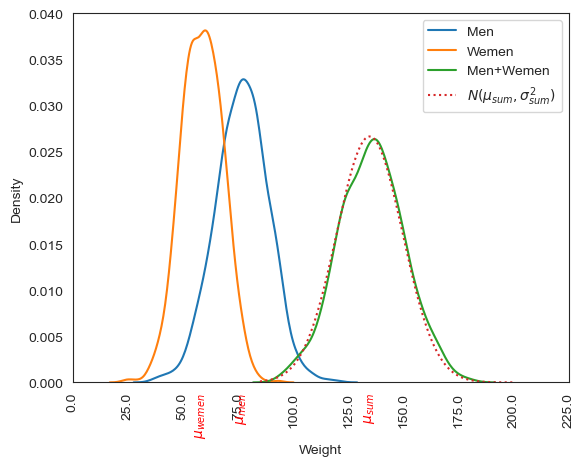

In [33]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men+Wemen'], label='Men+Wemen')

x = np.arange(85, 200, 0.01)
ax.plot(x, X_sum.pdf(x), linestyle=':', label=r'$N(\mu_{sum}, \sigma_{sum}^2)$')

x_ticks = np.append(ax.get_xticks(), [mu_men, mu_wemen, mu_sum])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{sum}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

- 차 데이터 분포 그래프

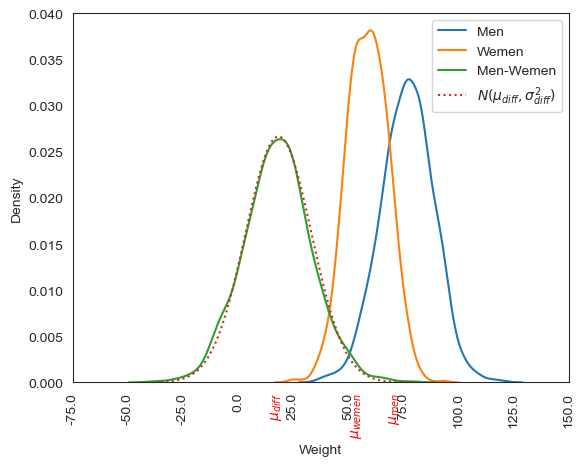

In [34]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men-Wemen'], label='Men-Wemen')

x = np.arange(-35, 80, 0.01)
ax.plot(x, X_diff.pdf(x), linestyle=':', label=r'$N(\mu_{diff}, \sigma_{diff}^2)$')

x_ticks = np.append(ax.get_xticks(), [71.2, 53.7, 17.5])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{diff}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

### 독립성의 중요성

$X$와 $Y$가 상호 독립이지 않으면 정규분포의 합과 차가 정규분포를 따르지 않을 수 있다.
설명을 위해 {numref}`%s장 <ch:normal-distribution>`에서 소개한
피어슨의 아버지와 아들의 키 데이터셋을 활용한다.
이유는 아들 키는 아버지의 키 유전자에 많은 영향을 받아 절대로 독립적일 수 없기 때문이다.

아래 코드는 피어슨<font size='2'>Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [35]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [36]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**아버지 키와 아들 키의 상관관계**

예상대로 아버지 키와 아들 키 데이터의 공분산이 0이 아니다.

In [37]:
pearson.cov(ddof=0)

,Father,Son
Father,48.612085,24.984513
Son,24.984513,51.125832


피어슨 상관계수를 보면 0.5 정도로 상당히 높은 편이다.
아버지 키가 아들 키에 많은 영향을 준다는 것이 확실하다.

In [38]:
pearson.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


결론적으로 두 데이터는 상호 독립이 절대로 아니다.
실제로 아버지키와 아들 키의 합은 정규분포를 따르지 않음을
아래 코드가 보여준다.

In [39]:
pearson['Father+Son'] = pearson['Father'] + pearson['Son']

pearson_desc = pearson.describe()
pearson_desc

,Father,Son,Father+Son
count,1078.000000,1078.000000,1078.000000
mean,171.922635,174.457978,346.380612
std,6.975473,7.153552,12.241158
min,149.900000,148.600000,307.800000
25%,167.100000,169.900000,338.025000
50%,172.200000,174.200000,346.400000
75%,176.800000,179.100000,354.800000
max,191.500000,199.100000,381.000000


평균값의 합은 유지된다.

In [40]:
mu_FS = pearson_desc.loc['mean', 'Father'] + pearson_desc.loc['mean', 'Son']
mu_FS

346.380612

그런데 합의 분산이 두 분산의 합과 다르다.

- 분산의 합

In [41]:
sigma_FS_squared = pearson_desc.loc['std', 'Father'] ** 2 + pearson_desc.loc['std', 'Son'] ** 2
sigma_FS_squared

99.830524

- 이론적인 아버지 키와 아들 키의 합의 표준편차

In [42]:
sigma_FS = np.sqrt(sigma_FS_squared)
sigma_FS

9.991523

이론과 실제 계산된 표준편차가 많이 다르다.

- 실제 아버지 키와 아들 키의 합의 표준편차

In [43]:
sigma_FaddS = pearson_desc.loc['std', 'Father+Son']
sigma_FaddS

12.241158

데이터의 분포를 그래프로 그려보면 합의 분포가 정규분포가 아님을 
보다 명확하게 확인할 수 있다.

- (아버지 키 + 아들 키)의 이론적 정규분포

In [44]:
from scipy.stats import norm

X_FS = norm(mu_FS, sigma_FS)

- 확률 밀도 함수 그래프로 구분하기

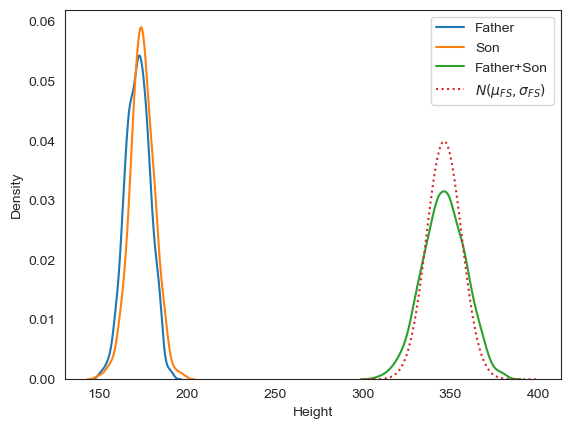

In [45]:
fig, ax = plt.subplots()

# KDE 기법으로 계산된 확률 밀도 함수 그래프
# 아버지 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Father'], label='Father')
# 아들 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Son'], label='Son')
# (아버지 키+아들 키)의 실제 분포: 정규분포 아님
sns.kdeplot(ax=ax, data=pearson['Father+Son'], label='Father+Son')

# (아버지 키+아들 키)의 이론적 정규분포
x = np.linspace(300, 400, 100)
ax.plot(x, X_FS.pdf(x), linestyle=':', label=r'$N(\mu_{FS}, \sigma_{FS})$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()
plt.show()

## 표본평균의 분포

**독립동일분포**

확률론에서 **독립동일분포**는 특정 확률분포를 따르는 데이터셋에서 무작위로 표본을 독립적으로 여러 번 추출해서 얻어진 값들로 구성된 데이터를 가리키는 다차원 확률변수를 의미한다.
독립동일분포는 보통 'independently and identically distributed'의 표현의 줄임말인 **iid**로 불린다.

예를 들어 동일한 주사위를 10 번 던져서 나온 값들로 구성된 튜플을 가리키는 iid는 $(X_1, X_2, \dots, X_{10})$으로,
무작위로 선택된 100명에게 물은 동일한 질문에 대한 답으로 구성된 튜플을 가리키는 iid는 $(X_1, X_2, \dots, X_{100})$으로
표기된다.

**표본평균의 분포**

독립동일분포인 다차원 확률변수 $(X_1, X_2, \cdots, X_n)$의 평균값이 따르는 분포가
**표본평균의 분포**다.
즉, 아래와 같이 정의된 확률변수 $\overline{X}$의 확률분포를 가리킨다.

$$
\overline{X} = \frac{X_1 + X_2 + \cdots + X_n}{n}
$$

$\overline{X}$의 기댓값과 분산은 다음과 같이 계산된다.

- 표본평균의 기댓값

$$
\begin{align*}
E[\overline{X}] &= E \left[ \frac{X_1 + X_2 + \cdots + X_n}{n} \right] \\[2ex]
    &= \frac{E[X_1] + E[X_2] + \cdots + E[X_n]}{n} \\[1.5ex]
    &= \frac{n \mu}{n} \\[1ex]
    &= \mu
\end{align*}
$$

- 표본평균의 분산

$$
\begin{align*}
V(\overline{X}) &= V \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) \\[2ex]
    &= \frac{V(X_1) + V(X_2) + \cdots + V(X_n)}{n^2} \\[1.5ex]
    &= \frac{n \sigma^2}{n^2} \\[1ex]
    &= \frac{\sigma^2}{n}
\end{align*}
$$

### 중심극한정리

확률변수 $X_1, X_2, \dots, X_n$이 서로 독립이고
모두 기댓값이 $\mu$, 분산이 $\sigma^2$인 동일한 확률분포를 따른다고 가정하자.
그러면 $n$이 충분히 클 때 표본평균 $\overline X$의 분포는 다음 정규분포를 따른다.

$$
\overline{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right)
$$

**예제: 캘리포니아 주택가격 데이터셋**

{numref}`%s장 <ch:smapling>`에서 모집단과 표본을 설명할 때 사용한 캘리포니아 주택가격 데이터셋을 다시 활용하여
표본평균의 분포를 확인한다.

 먼저 캘리포니아 주택가격 데이터셋을 불러온다.

In [46]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


가구중위소득과 주택중위가격만 활용한다.

In [47]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.

In [48]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


**10% 표본추출**

전체 데이터셋의 10%를 표본으로 추출한다.
총 인덱스에서 무작위로 10%의 인덱스를 선택한다.

In [49]:
np.random.seed(17)
total_number = housing.shape[0]
percent = 0.1
sample_size = int(total_number * percent)
random_indices = np.random.choice(total_number, sample_size)

추출된 인덱스를 갖는 샘플만 선택하여 표본으로 지정한다.

In [50]:
sampling = housing.iloc[random_indices]
sampling

,median_income,median_house_value
district,,
10863,6.1572,344000.0
2191,7.4201,229700.0
13702,2.4821,140600.0
406,8.8342,430500.0
9529,3.7426,162700.0
...,...,...
12936,3.2232,88300.0
6778,3.6458,208100.0
2969,2.5575,100200.0


선택된 표본의 평균값은 다음과 같다.

In [51]:
sampling.mean()

median_income              3.670131
median_house_value    192042.297407
dtype: float64

모평균과 매우 유사하다.

In [52]:
housing.mean()

median_income              3.676717
median_house_value    192477.921017
dtype: float64

**표본추출 반복**

아래 코드의 `X_income10p`와 `X_value10p`는 각각 
캘리포니아 데이터셋에서 무작위로 10%의 샘플을 선택하는 과정을
1만번 반복할 때마다 계산된 중위소득 평균값과 중위주택가격의 평균값을 포함한다.

In [53]:
np.random.seed(17)
sampling_count = 10000

X_income10p = np.zeros(sampling_count)
X_value10p = np.zeros(sampling_count)

total_number = housing.shape[0]
percent = 0.1
sample_size = int(total_number * percent)

for i in range(sampling_count):
    random_indices = np.random.choice(total_number, sample_size)
    sampling = housing.iloc[random_indices]
    X_income10p[i] = sampling['median_income'].mean()
    X_value10p[i] = sampling['median_house_value'].mean()    

두 리스트를 모아 데이터프레임을 생성한다.

In [54]:
X_10p = pd.DataFrame({'중위소득 표본평균':X_income10p, '중위주택가격 표본평균':X_value10p})
X_10p

,중위소득 표본평균,중위주택가격 표본평균
0,3.670131,192042.297407
1,3.657893,193126.792069
2,3.714175,194317.691917
3,3.644522,192156.532791
4,3.612762,190589.781393
...,...,...
9995,3.653294,192425.470259
9996,3.657381,190748.906965
9997,3.662978,192748.601423
9998,3.671054,192748.296390


모아진 표본평균 자체로 새로운 분포를 가지며 두 특성의 표본평균의 평균값과 다음과 같다.

In [55]:
X_10p.mean()

중위소득 표본평균           3.676474
중위주택가격 표본평균    192458.915808
dtype: float64

두 특성 모두 모평균과 매우 유사하다.

In [56]:
housing.mean()

median_income              3.676717
median_house_value    192477.921017
dtype: float64

반면에 표본평균의 분산은 모분산을 표본의 크기인 `sample_size10`로 나눈 값과 유사하다.

In [57]:
X_10p.var(ddof=0)

중위소득 표본평균      1.239007e-03
중위주택가격 표본평균    4.815000e+06
dtype: float64

In [58]:
housing.var(ddof=0) / sample_size

median_income         1.253496e-03
median_house_value    4.853612e+06
dtype: float64

아래 코드는 중위소득 표본평균의 분포가 
전체 데이터셋의 중위소득의 평균값을 평균값으로, 모분산을 샘플크기로 나눈 값을 분산으로 갖는 정규분포를 따름을 그래프로 보인다.

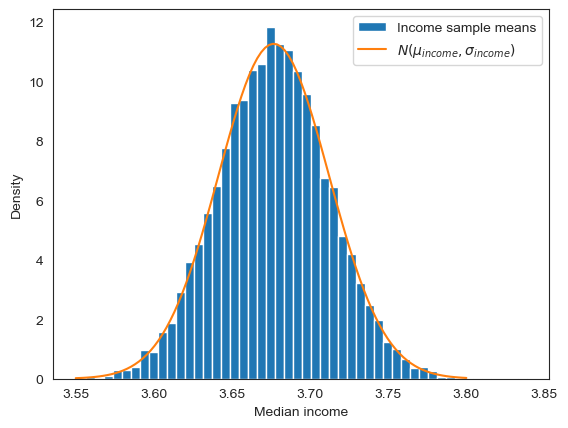

In [67]:
from scipy.stats import norm

fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(X_10p['중위소득 표본평균'], bins=50, density=True, label='Income sample means')

# 모평균을 평균값으로 ,모분산을 샘플크기로 나눈 값을 분산으로 갖는 정규분포 그래프
mu_income = housing.mean().iloc[0]
sigma_income = np.sqrt((housing.var().iloc[0]) / sample_size)

X10_normal = norm(loc=mu_income, scale=sigma_income)
x = np.linspace(3.55, 3.80, 100)
ax.plot(x, X10_normal.pdf(x), label=r'$N(\mu_{income}, \sigma_{income})$')

ax.set_xlabel('Median income')
ax.set_ylabel('Density')

ax.legend()

plt.show()

아래 코드는 중위주택가격 표본평균의 분포가 
전체 데이터셋의 중위주택가격의 평균값을 평균값으로, 
모분산을 샘플크기로 나눈 값을 분산으로 갖는 정규분포를 따름을 그래프로 보인다.

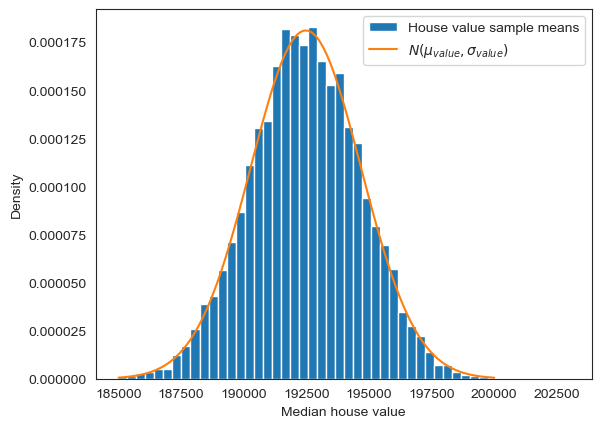

In [70]:
from scipy.stats import norm

fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(X_10p['중위주택가격 표본평균'], bins=50, density=True, label='House value sample means')

# 모평균을 평균값으로 ,모분산을 샘플크기로 나눈 값을 분산으로 갖는 정규분포 그래프
mu_value = housing.mean().iloc[1]
sigma_value = np.sqrt((housing.var().iloc[1]) / sample_size)

Y10_normal = norm(loc=mu_value, scale=sigma_value)
y = np.linspace(185000, 200000, 100)
ax.plot(y, Y10_normal.pdf(y), label=r'$N(\mu_{value}, \sigma_{value})$')

ax.set_xlabel('Median house value')
ax.set_ylabel('Density')

ax.legend()

plt.show()

### 큰 수의 법칙

확률변수 $X_1, X_2, \dots, X_n$이 서로 독립이고
모두 기댓값이 $\mu$, 분산이 $\sigma^2$인 동일한 확률분포를 따른다고 가정하자.
그러면 $n$이 증가할 때 표본평균 $\overline X$는 모평균 $\mu$에 수렴한다.

캘리포니아 데이터셋에서 선택한 표본의 크기를 최대 30%까지 키울 때 표본평균의 변화를 살펴본다.
아래 코드는 캘리포니아 데이터셋의 30% 정도 크기의 표본을 무작위로 선택한다.

In [60]:
np.random.seed(1)

total_number = housing.shape[0]
percent = 0.3
sample_size = int(total_number * percent)
random_indices = np.random.choice(total_number, sample_size)
sampling = housing.iloc[random_indices]

아래 코드는 인덱스 `i`가 1부터 1만까지 변할 때 슬라이싱을 이용하여
두 특성에 대한 `i`개의 샘플의 평균값을 계산한다.
즉, 누적 평균값을 계산하며 계산된 누적 평균값으로 구성된 데이터프레임을 생성한다.

In [61]:
income_means = np.zeros(sample_size)
value_means = np.zeros(sample_size)

for i in range(sample_size):
    sampling_i = sampling.iloc[:i+1]
    income_means[i] = sampling_i.mean().iloc[0]
    value_means[i] = sampling_i.mean().iloc[1]    

sample_means = pd.DataFrame({'중위소득 표본평균':income_means, '중위주택가격 표본평균':value_means})
sample_means

,중위소득 표본평균,중위주택가격 표본평균
0,2.666700,122000.000000
1,2.242150,141450.000000
2,2.835800,212266.666667
3,3.749675,262175.000000
4,3.584740,244940.000000
...,...,...
5897,3.678435,191343.048321
5898,3.678052,191342.752839
5899,3.677689,191319.898136
5900,3.677514,191316.031012


아래 코드는 중위소득 표본평균의 누적 평균이 표본의 크기가 커짐에 따라 중위소득 모평균에 수렴함을 보여준다.

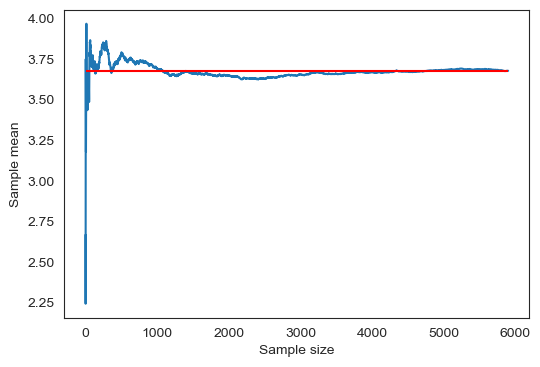

In [62]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

sample_means['중위소득 표본평균'].plot()

# 표본평균의 평균값
mu_population = housing.mean().iloc[0]
ax.hlines(mu_population, 0, sample_size, color='red')

ax.set_xlabel('Sample size')
ax.set_ylabel('Sample mean')

plt.show()

반면에 아래 코드는 중위주택가격 표본평균의 누적 평균이 표본의 크기가 커짐에 따라 중위주택가격 모평균에 수렴함을 보여준다.

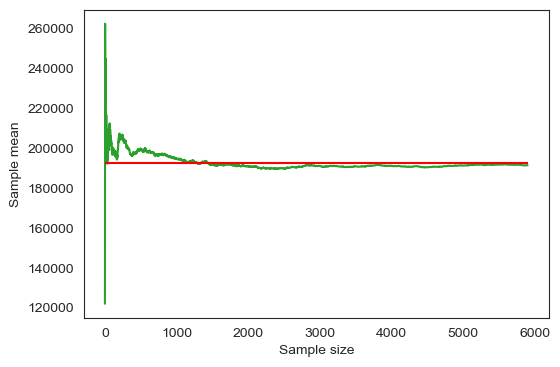

In [63]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

sample_means['중위주택가격 표본평균'].plot(color='tab:green')

# 표본평균의 평균값
mu_population = housing.mean().iloc[1]
ax.hlines(mu_population, 0, sample_size, color='red')

ax.set_xlabel('Sample size')
ax.set_ylabel('Sample mean')

plt.show()

## 연습문제

참고: [(연습) 표본 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling_distribution.ipynb)